<a href="https://colab.research.google.com/github/pahwa1902/LearMachineLearning/blob/master/PbsKids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import ast
import json
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
! ls '/content/drive/My Drive/'

In [0]:
train = pd.read_csv('/content/drive/My Drive/train.csv')

In [0]:
train.head()

In [0]:
train_data = pd.DataFrame(train)

In [0]:
(set(train_data['title']))

In [0]:
train_data[train_data['installation_id']=='0001e90f']['world'].unique()

In [0]:
label = pd.read_csv('/content/drive/My Drive/train_labels.csv')

In [0]:
labels = pd.DataFrame(label)

In [0]:
labels[labels['installation_id']=='0006a69f']

In [0]:
#data = train_data[train_data['installation_id']=='00abaee7']
train_data[train_data['event_id']=='cfbd47c8']['event_data'].unique()

In [0]:
#data = train_data[train_data['installation_id']=='00abaee7']
#data_asset = data[data['game_session']=='6bdf9623adc94d89']
train_data[data['event_id']=='ab3136ba']
#data_asset.groupby(['title']).event_id.count()


In [0]:
len(train_data['title'].unique())

In [0]:
event = pd.read_csv('/content/drive/My Drive/specs.csv')

In [0]:
event_data = pd.DataFrame(event)

In [0]:
event_data[event_data['event_id']=='cfbd47c8']['info']

In [0]:
len(event)

In [0]:
columns = ['installation_id','Total game time','Total Activity time','Total Assessment time','game events','clip events','activity events','assessment type','game sessions','world_TreeTopCity','world_None','world_MagmaPeak','world_CrystalCaves']

In [0]:
pbstrain = pd.DataFrame(columns=columns)

In [0]:
data_user = train_data[train_data['installation_id']=='0006a69f']
data_time = data_user.groupby(['type']).game_time.sum()
print(data_time)

In [0]:
user = train_data[train_data['installation_id']=='0006a69f']
total_time= user.groupby(['type']).game_time.sum()
assessment = user[user['type']=='Assessment']
assess_type = assessment['title'].unique()
print(assess_type)

['Mushroom Sorter (Assessment)' 'Bird Measurer (Assessment)']


In [0]:
def max_count(i,type):
  user = train_data[train_data['installation_id']==i]
  user[user['type']==type]['event_count'].max()

In [0]:
gamesession=[]
eventcount=[]
for i in train_data['installation_id'].unique():
  user = train_data[train_data['installation_id']==i]
 
  for j in user['title'].unique():
    user_title = user[user['title']==j]
    data_game = len(user_title['game_session'].unique())
    data_count = user[user['title']==j]['event_count'].max()
    gamesession.append(data_game)
    eventcount.append(data_count)
    

In [0]:
len(train_data)

In [0]:
data_session = (train_data.groupby(['installation_id','title']).game_session.unique())

In [0]:
data_event = (train_data.groupby(['installation_id','title']).event_id.unique())

In [0]:
print(data_event)

In [0]:
session = pd.DataFrame(data_session)

In [0]:
event = pd.DataFrame(data_event)

In [0]:
users = train_data['installation_id'].unique()

In [0]:
a = (event.loc['0001e90f'])

In [0]:
a.index.tolist()

In [0]:
features1 = event_data['event_id']+'_event'
features2 = event_data['event_id']+'_session'

In [0]:
features1

In [0]:
eventframe = pd.DataFrame(columns=features1)
sessionframe = pd.DataFrame(columns=features2)

In [0]:
features = event_data['event_id']

In [0]:
users = labels['installation_id'].unique()
users = users[:1000]

In [0]:
train_data['timestamp'] = pd.to_datetime(train_data['timestamp'])

In [0]:
#Total event time
total_event_time=[]
game_sessions = []
events = []
game_events=[]
clip_events=[]
activity_events=[]
treetopcity = []
magmapeak=[]
crystalcave=[]
for i in users:
  a = train_data[train_data['installation_id']==i]
  total_event = a.groupby(['game_session']).game_time.agg(['max'])
  total_event_df = pd.DataFrame(total_event)
  total_event_df.reset_index(inplace=True)
  total_event_time.append(sum(total_event_df['max']))
  game_sessions.append(a['game_session'].nunique())
  events.append(a['event_code'].nunique())
  game_events.append(a[a['type']=='Game']['event_code'].nunique())
  clip_events.append(a[a['type']=='Clip']['event_code'].nunique())
  activity_events.append(a[a['type']=='Activity']['event_code'].nunique())
  treetopcity.append(a[a['world']=='TREETOPCITY']['event_code'].nunique())
  magmapeak.append(a[a['world']=='MAGMAPEAK']['event_code'].nunique())
  crystalcave.append(a[a['world']=='CRYSTALCAVES']['event_code'].nunique())

In [0]:
treetopcity_time=[]
magmapeak_time=[]
crystalcave_time=[]
avg_eventcount=[]
max_eventcount=[]
min_eventcount=[]
std_eventcount=[]
for i in users:
  a = train_data[train_data['installation_id']==i]
  data_world = a.groupby(['game_session','world']).game_time.max()
  data_event = a.groupby(['game_session']).event_count.max()
  std_eventcount.append(data_event.std())
  std_data = a.groupby(['game_session'])
  data_world_df = pd.DataFrame(data_world)
  data_event_df = pd.DataFrame(data_event)
  data_world_df.reset_index(inplace=True)
  data_event_df.reset_index(inplace=True)
  magma = data_world_df[data_world_df['world']=='MAGMAPEAk']
  magmapeak_time.append(sum(magma['game_time']))
  treetop = data_world_df[data_world_df['world']=='TREETOPCITY']
  treetopcity_time.append(sum(treetop['game_time']))
  crystal = data_world_df[data_world_df['world']=='CRYSTALCAVES']
  crystalcave_time.append(sum(crystal['game_time']))
  max_eventcount.append(max(data_event_df['event_count']))
  min_eventcount.append(min(data_event_df['event_count']))
  avg_eventcount.append(sum(data_event_df['event_count'])/len(data_event_df))
  

In [0]:
column_games = train_data['title'].unique().tolist()

In [0]:
# game time with respect to each title
games_df = []
for i in users:
  a = train_data[train_data['installation_id']==i]
  data_games = a.groupby(['game_session','title']).game_time.max()
  data_games_df = pd.DataFrame(data_games)
  data_games_df.reset_index(inplace=True)
  data = [sum(data_games_df[data_games_df['title']==j]['game_time']) if j in data_games_df['title'].unique().tolist() else 0 for j in column_games]
  games_data = {column_games[j]:data[j] for j in range(len(column_games))}
  games_df.append(games_data)

In [0]:
game_data_df = pd.DataFrame(games_df)


In [0]:
#avg and max event count
avg_event=[]
max_event=[]
for i in users:
  a = train_data[train_data['installation_id']==i]
  event = a.groupby(['game_session']).event_id.agg(['size'])
  event_df = pd.DataFrame(event)
  event_df.reset_index(inplace=True)
  avg_event.append(sum(event_df['size'])/len(event_df))
  max_event.append(max(event_df['size']))

In [0]:
game_time=[]
activity_time=[]
clip_time=[]
max_game_session=[]
min_game_session=[]
for i in users:
  a = train_data[train_data['installation_id']==i]
  event_type = a.groupby(['game_session','type']).game_time.max()
  game_session_max = a.groupby(['game_session']).game_time.max()
  game_session_min = a.groupby(['game_session']).game_time.min()
  max_game_session.append(max(game_session_max))
  min_game_session.append(min(game_session_min))
  event_type_df = pd.DataFrame(event_type)
  event_type_df.reset_index(inplace=True)
  game = event_type_df[event_type_df['type']=='Game']
  game_time.append(sum(game['game_time']))
  activity = event_type_df[event_type_df['type']=='Activity']
  activity_time.append(sum(activity['game_time']))
  clip = event_type_df[event_type_df['type']=='Clip']
  clip_time.append(sum(activity['game_time']))

In [0]:
def total_duration(a):
  if('total_duration' in a):
    return a["total_duration"]
  else:
    return 0

In [0]:
def duration(a):
  if('duration' in a):
    return a["duration"]
  else:
    return 0

In [0]:
train_data = train_data.reindex(columns=train_data.columns.tolist()+['total_duration','duration'])

In [0]:

train_data['total_duration'] = train_data['event_data'].apply(lambda x:total_duration(json.loads(x)))
train_data['duration'] = train_data['event_data'].apply(lambda x:duration(json.loads(x)))

In [0]:
media_duration=[]
drag_duration=[]
for i in users:
  a = train_data[train_data['installation_id']==i]
  media_duration.append(sum(a['total_duration']))
  drag_duration.append(sum(a['duration']))

In [0]:
columns_event = event_data['event_id'].tolist()
event_columns=[]
for i in columns_event:
  event_columns.append(i+'_event')

In [0]:

event_data_columns=[]
for i in users:
  a = train_data[train_data['installation_id']==i]
  data_event = a.groupby(['event_id']).game_time.agg(['max'])
  data_event_df = pd.DataFrame(data_event)
  data_event_df.reset_index(inplace=True)
  data = [data_event_df[data_event_df['event_id']==j]['max'].values if j in data_event_df['event_id'].unique().tolist() else 0 for j in columns_event]
  events_data = {event_columns[j]:data[j] for j in range(len(columns_event))}
  event_data_columns.append(events_data)

In [0]:
event_data_df = pd.DataFrame(event_data_columns)

In [0]:
pd.Series(game_events).var()

In [0]:
frames = [event_data_df,game_data_df,pd.Series(total_event_time),pd.Series(game_sessions),pd.Series(events),pd.Series(game_events),pd.Series(clip_events),pd.Series(activity_events),pd.Series(treetopcity),pd.Series(magmapeak),pd.Series(crystalcave),pd.Series(treetopcity_time),pd.Series(magmapeak_time),
          pd.Series(crystalcave_time),pd.Series(avg_eventcount),pd.Series(max_eventcount),pd.Series(min_eventcount),pd.Series(std_eventcount),pd.Series(avg_event),pd.Series(max_event),pd.Series(game_time),pd.Series(activity_time),pd.Series(clip_time),pd.Series(max_game_session),
          pd.Series(min_game_session),pd.Series(media_duration),pd.Series(drag_duration)]
features_df = pd.concat(frames,axis=1)

In [0]:
features_copy = features_df.copy()

In [0]:
features_copy = features_df.copy()
columns_data = features_df.columns
for i in columns_data:
  aa = np.array(features_copy[i]).reshape(-1,1)
  scaler = MinMaxScaler()
  features_copy[i]=scaler.fit_transform(aa)

In [0]:
data_labels=[]
for i in users:
  a = labels[labels['installation_id']==i]
  if (a.empty):
    data_labels.append(0)
  else:
    data_labels.append(sum(a['accuracy'])/len(a))

In [0]:
data_labels

In [0]:
corr = features_copy.corr()

In [0]:
print(corr)

In [0]:
features_df.columns.tolist()

In [0]:
features_copy

In [0]:
variance = sorted(features_copy.var().tolist(),reverse=True)
print(variance)

In [366]:
data_labels = pd.Series(data_labels)
data_labels.var()

0.1045073087969483

In [0]:
variance_list = features_copy.var().tolist()
columns_list = features_copy.columns

In [0]:
variance_dict = {columns_list[j]:variance_list[j] for j in range(len(columns_list))}
features_copy=features_copy.append(variance_dict,ignore_index=True)

In [0]:
features_df_clone = features_copy.copy()

In [0]:
for j in range(len(features_copy.columns)):
  if(features_copy.iloc[-1,j]<0.01):
    features_df_clone=features_df_clone.drop(columns_list[j],axis=1)
  else:
    continue

In [0]:
features_df_clone = features_df_clone.iloc[:-1]

In [0]:
features_df_clone_train = features_df_clone.iloc[:800]
data_labels_train = data_labels.iloc[:800]
features_test = features_df_clone.iloc[800:]
data_labels_test = data_labels.iloc[800:]

In [0]:
booster = xgb.XGBRegressor()
booster.fit(features_df_clone_train.values,data_labels_train)

In [0]:
predict_data = booster.predict(features_test.values)

In [370]:
mean_squared_error(predict_data,data_labels_test)

0.02446242727939824

In [0]:
predict_data = predict_data.tolist()

In [0]:
predict = [pd.Series(data_labels_test.tolist()),pd.Series(predict_data)]
predict_df = pd.concat(predict,axis=1)

In [0]:
feature_importance = booster.feature_importances_

In [0]:
columns_new = features_df_clone.columns

In [0]:
feature_dict = {columns_new[j]:feature_importance[j] for j in range(len(feature_importance))}

In [0]:
indices = np.argsort(feature_importance)
len(indices)

Text(0.5, 0, 'Relative importance')

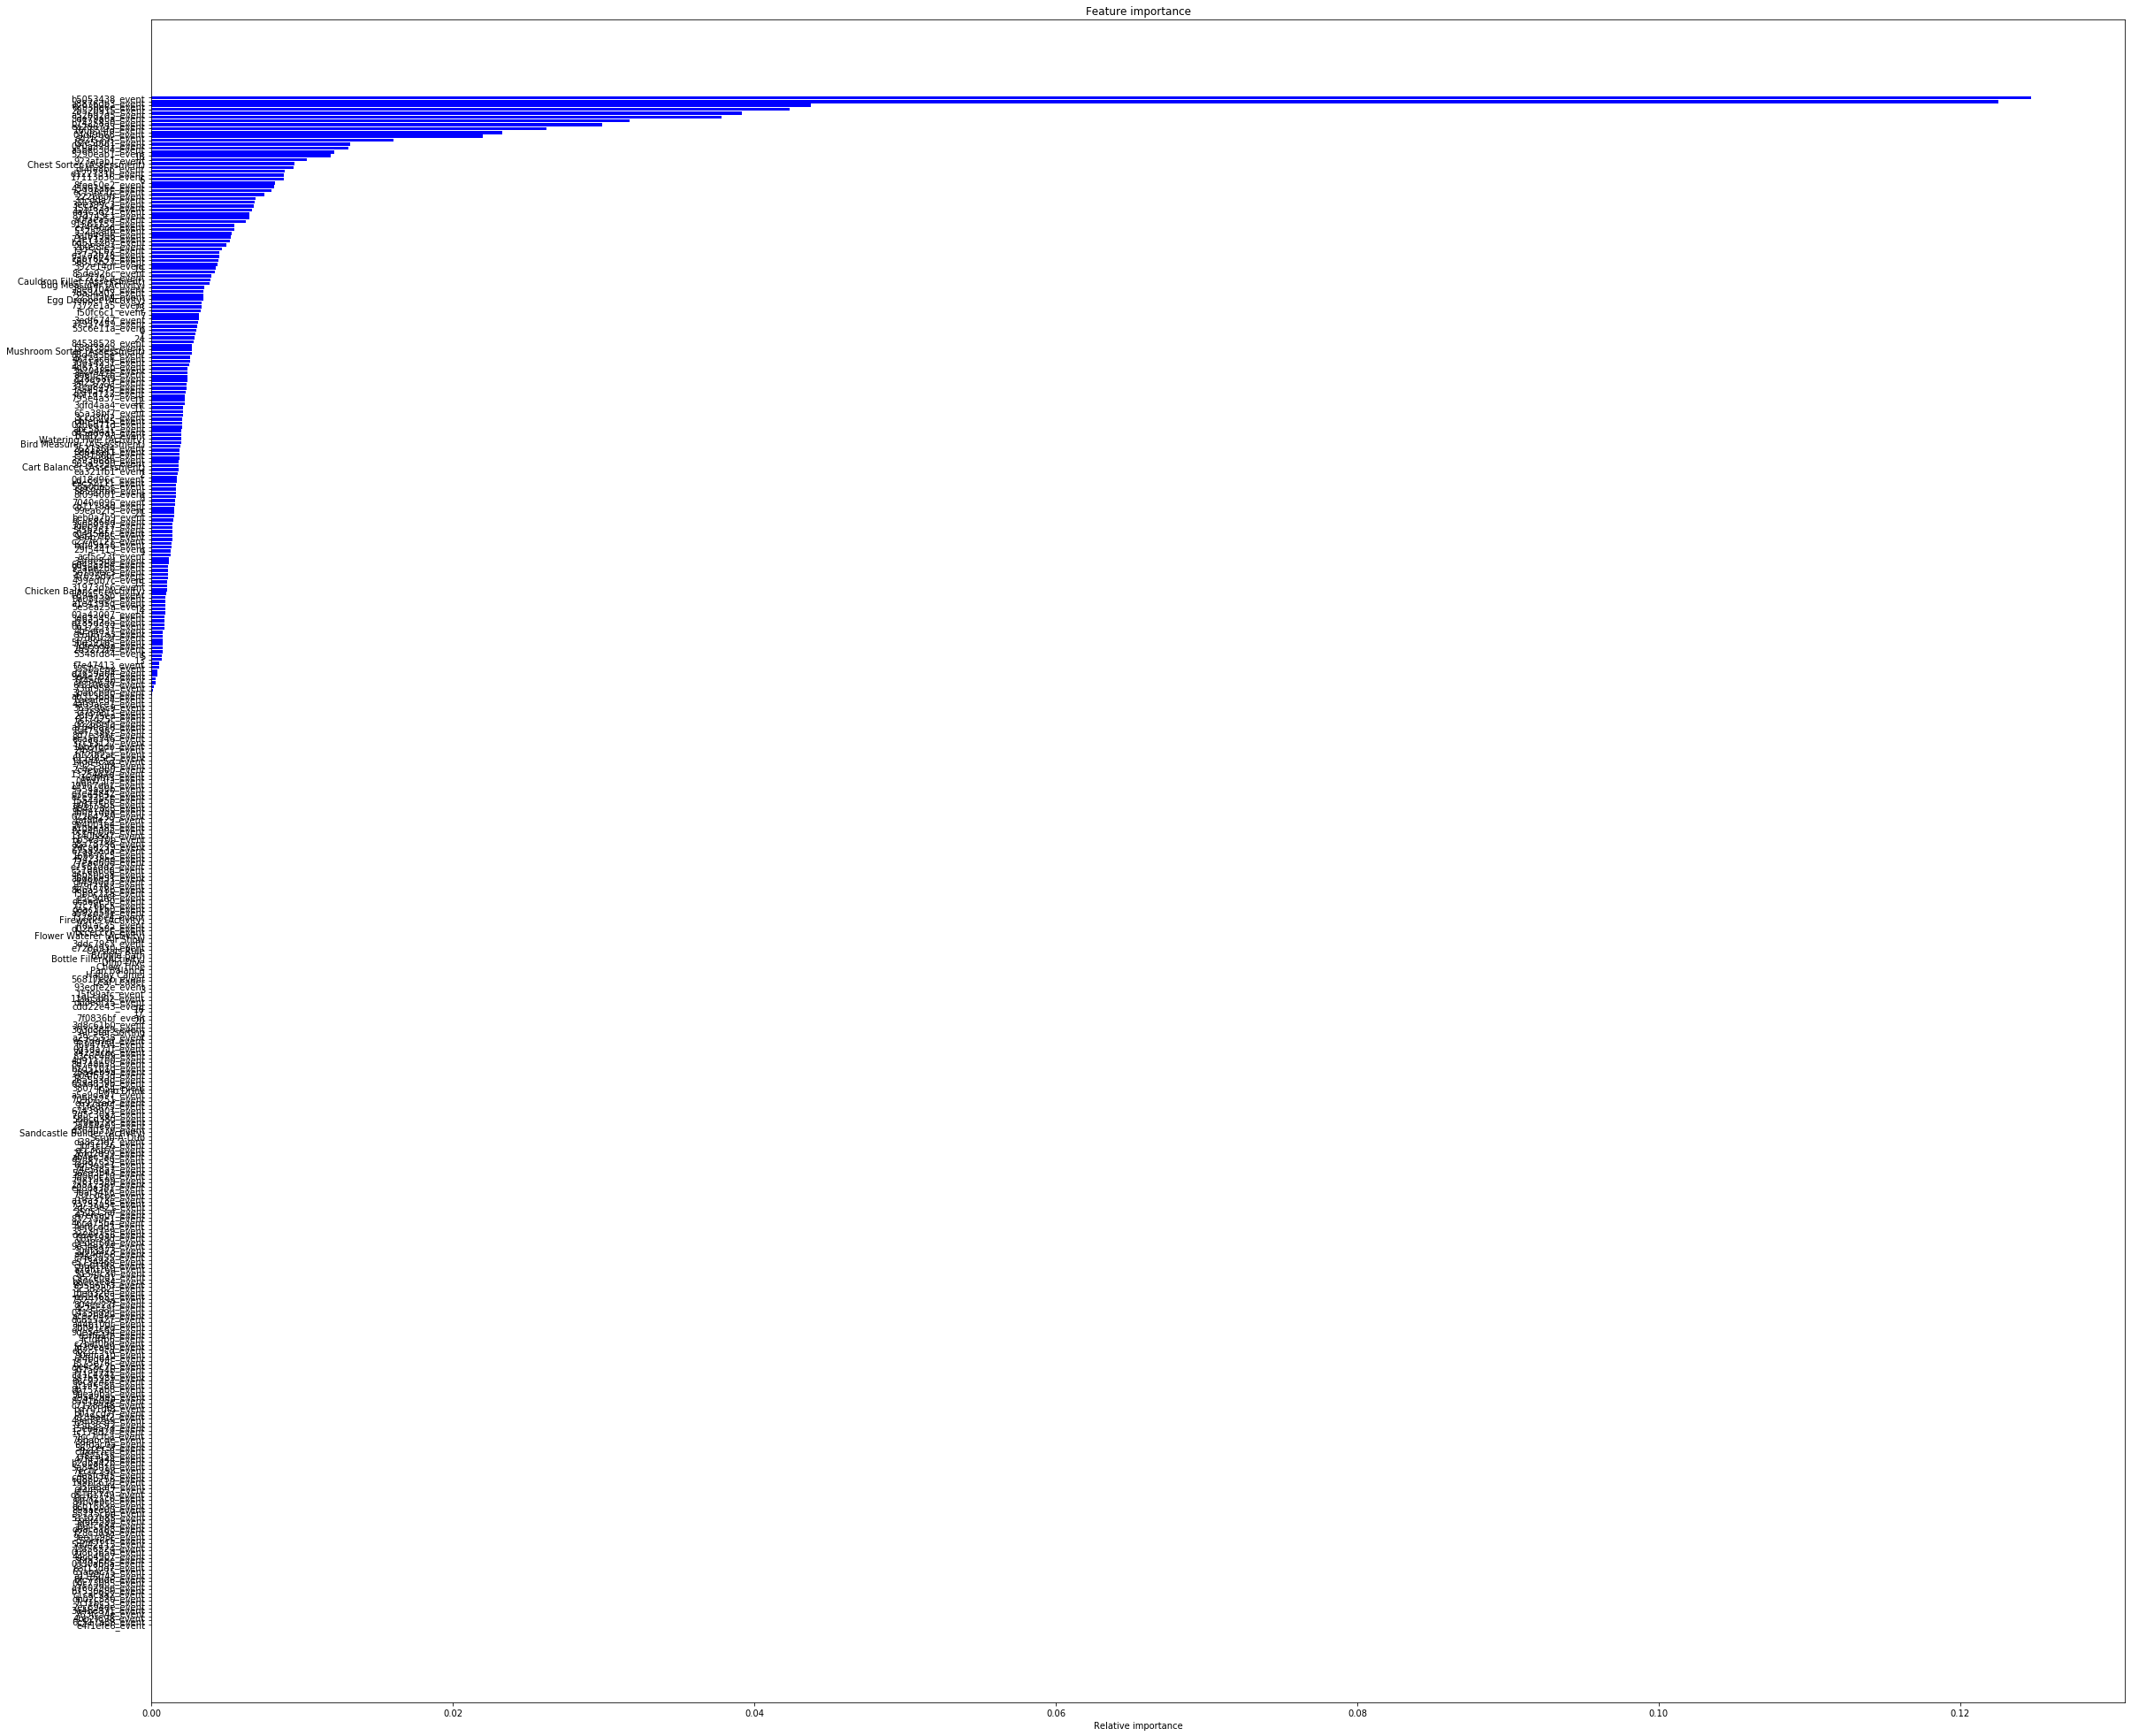

In [378]:
plt.figure(figsize=(40,35))
plt.title("Feature importance")
plt.barh(range(len(indices)), feature_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)),[columns_new[i] for i in indices])
plt.xlabel("Relative importance")